(linear-programing)=
# Programación Lineal

Supongamos que tenemos una fábrica que es capaz de generar dos productos, el producto A y el producto B. Para producir tales bienes, la fábrica necesita invertir cierto dinero en materiales y otro tanto en mano de obra, con el fin de vender los productos y obtener el beneficio. Pongamos que los costes y beneficios por unidad producida son los siguientes 

|              | Producto A | Producto B |
|--------------|:----------:|:----------:|
| Material     |      2     |      5     |
| Mano de obra |      4     |      2     |
| Beneficio    |      3     |      4     |

Partiendo de, digamos, 30 unidades monetarias destinadas a material y 20 para mano de obra, ¿cuál es el plan de producción óptimo para esta fabrica, es decir, cuántos productos de A y de B debe producir con los recursos disponibles? 

Este problema es lo que se conoce como un problema de **programación lineal**, que en general consiste en maximizar o minimizar una *función objetivo* lineal bajo una serie de igualdades o desigualdades que restringen el conjunto de posibles soluciones. En el ejemplo anterior podemos enunciar el problema del siguiente modo

$$
\begin{aligned}
\text{max. } \quad &  3x_1 + 4x_2\\
\text{s.t. }\quad &
\begin{array}{c}
2x_1 + 5x_2 \leq 30 \\
4x_1 + 2x_2 \leq 20 \\
x_1, x_2 \geq 0 
\end{array}
\end{aligned}   
$$

En el siguiente gráfico podemos visualizar el conjunto de posibles soluciones del problema 

In [2]:
%config InlineBackend.figure_format='retina'

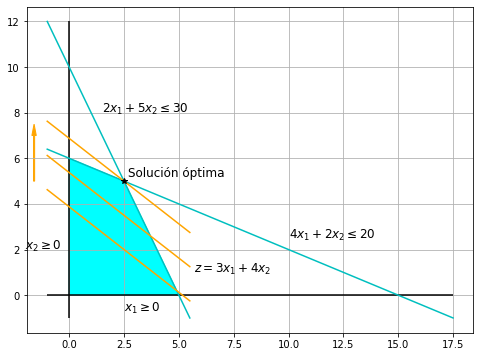

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Dibujamos las líneas de restricción
range1 = np.linspace(-1, 17.5, 100)
range2 = np.linspace(-1, 5.5, 100)
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(range1, 6-0.4*range1, color="c")
ax.plot(range2, 10-2*range2, color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Dibujamos la región factible
feasible_set = Polygon(
    np.array(
        [
            [0, 0], 
            [0, 6], 
            [2.5, 5], 
            [5, 0]
        ]
    ), 
    color="cyan"
)
ax.add_patch(feasible_set)

# Dibujamos la función objetivo
ax.plot(range2, 3.875-0.75*range2, color="orange")
ax.plot(range2, 5.375-0.75*range2, color="orange")
ax.plot(range2, 6.875-0.75*range2, color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Dibujamos la solución óptima 
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Solución óptima", size=12)

plt.show()

Más generalmente, podemos plantear el problema como el minimizar una función de coste lineal $c^\text{t}x = \sum_{i=1}^n c_ix_i$ sobre un conjunto de valores factibles de $x=(x_1, x_2, \dots, x_n)$ sujeto a las restricciones dadas por desigualdades o igualdades. Es decir, 

$$
\begin{aligned}
\text{min. } \quad &  c^\text{t}x\\
\text{s.t. }\quad &
\begin{array}{c}
a_i^\text{t}x \geq b_i \quad & i \in M_1\\
a_i^\text{t}x \geq b_i \quad & i \in M_2\\
a_i^\text{t}x \leq b_i \\
\end{array}
\end{aligned}   
$$